In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
first_line= session.query(Measurements).first()
first_line.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1a849011940>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [12]:
oneyear = dt.date(2017,8,23) - dt.timedelta(days=365)
print(oneyear)

2016-08-23


In [13]:
#for row in session.query(Measurement.date, Measurement.tobs, Measurement.id, Measurement.station, Measurement.prcp).all
#for row in session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).filter(Measurement.date>"2016-08-23").all():
   #print(row)
    
date_plot = session.query(Measurements.date, Measurements.prcp).order_by(Measurements.date.desc()).filter(Measurements.date>"2016-08-23").all()
df = pd.DataFrame(date_plot, columns=["Date", "Precip."])
df.set_index("Date", inplace=True)
df.head()

,Precip.
Date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


<function matplotlib.pyplot.show(*args, **kw)>

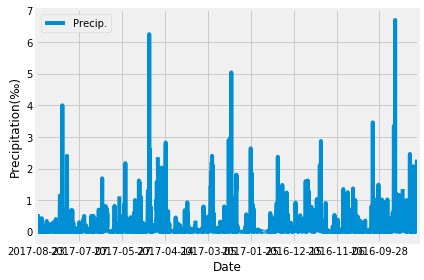

In [14]:
df.plot(x_compat=True)
plt.xlabel("Date")
plt.ylabel("Precipitation(‰)")
plt.tight_layout()
plt.show

In [15]:
df.describe()

,Precip.
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


first_line= session.query(Station).first()
first_line.__dict__

In [16]:
# Design a query to show how many stations are available in this dataset?


In [17]:
first_line= session.query(Stations).first()
first_line.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1a84b2931d0>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397',
 'elevation': 3.0,
 'latitude': 21.2716,
 'id': 1}

In [18]:
session.query(Stations.id).count()

9

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [20]:
session.query(Measurements.station, func.count(Measurements.station)).group_by(Measurements.station).order_by(func.count(Measurements.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [22]:
session.query(func.min(Measurements.tobs)).all()

[(53.0)]

In [23]:
session.query(func.max(Measurements.tobs)).all()

[(87.0)]

In [24]:
session.query(func.avg(Measurements.tobs)).filter(Measurements.station=="USC00519281").all()

[(71.66378066378067)]

In [25]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [26]:
high_temp = session.query(Measurements.tobs).filter(Measurements.station=="USC00519281").filter(Measurements.date>"2016-08-23").all()
df2=pd.DataFrame(high_temp)
df2.head()

,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0


<function matplotlib.pyplot.show(*args, **kw)>

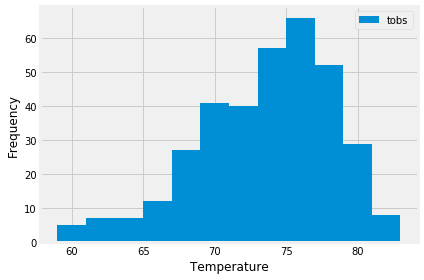

In [27]:
df2.plot.hist(by = "station", bins = 12, figsize = (6,4))
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show

In [28]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).\
        filter(Measurements.date >= start_date).filter(Measurements.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [29]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [30]:
my_trip_init = dt.date(2012,2,28)
my_trip_end = dt.date(2012,3,5)

init = my_trip_init-dt.timedelta(days = 365)
end = my_trip_end-dt.timedelta(days = 365)

temp_values = calc_temps(init, end)
temp_values


[(61.0, 70.08928571428571, 75.0)]

In [31]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


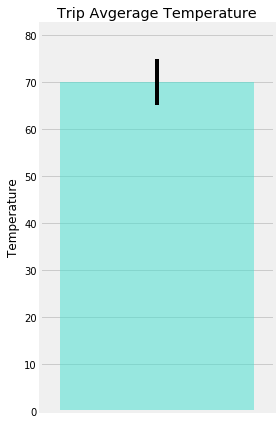

In [32]:
plot, ax = plt.subplots(figsize = plt.figaspect(1.5))
avg_temp = temp_values[0][1]
xpos = 2
error = temp_values[0][2]-temp_values[0][1]
bar = ax.bar(xpos, avg_temp, yerr = error, alpha = 0.5, color = "turquoise", align = "center"), ax.set(xticks = range(xpos), xticklabels = "a", title = "Trip Avgerage Temperature", ylabel = "Temperature"), ax.margins(0.1, 0.1)

plt.tight_layout()
plt.show()

In [33]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

In [34]:
first_line= session.query(Stations).first()
first_line.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1a84b2931d0>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397',
 'elevation': 3.0,
 'latitude': 21.2716,
 'id': 1}

In [35]:
rainfall_values = [Stations.station, Stations.name, Stations.latitude, Stations.longitude, Stations.elevation, func.sum(Measurements.prcp)]
rain_val = session.query(*rainfall_values).filter(Measurements.station == Stations.station).filter(Measurements.date>init).filter(Measurements.\
date<end).group_by(Stations.station, Stations.name, Stations.latitude, Stations.elevation).order_by(func.sum(Measurements.prcp)).all()

print(rain_val)


[('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.63), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 1.38), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 1.44), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 1.45), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 1.96), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 2.17), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 2.23), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 2.33)]


In [36]:
rain = [('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None),
        ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.63),
        ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 1.38),
        ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 1.44),
        ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 1.45),
        ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 1.96),
        ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 2.17),
        ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 2.23),
        ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 2.33)]
df = pd.DataFrame(rain, columns=["Station", "Name", "Latitude", "Longitude", "Elevation", "Precipitation" ])
df

,Station,Name,Latitude,Longitude,Elevation,Precipitation
0,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,NaN
1,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,0.63
2,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,1.38
3,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,1.44
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,1.45
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,1.96
6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,2.17
7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,2.23
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,2.33
